In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa
import simpledorff

In [2]:
file_name = "../annotated_multipico_new.xlsx"
sheet_names = ['Alessandro', 'Cristina', 'Eliana', 'Michele', 'Michael', 'Elisa']
df = pd.read_excel(file_name, sheet_name=sheet_names)
df['Alessandro'].head()

,level,source,reply,post,language,language_variety,reply_id,post_id,majority_vote,Unnamed: 9,rhetorical figure,comment
0,2,twitter,@USER @USER Anche per rompere il ghiaccio,@USER Gianca già che ci sei regalale un paio d...,it,it,15902900000000000000,7961696982295378944,1,NaN,"CONTEXT SHIFT, HYPERBOLE",NaN
1,2,twitter,@USER Nonnino! Già sveglio? ??,@USER Non troppo buongiorno,it,it,4652170000000000000,4824587311292975104,1,NaN,"RHETORICAL QUESTION, HYPERBOLE",NaN
2,1,twitter,@USER il terrone di essere rimpiazzata,il terrore di essere rimpiazzata,it,it,18161900000000000000,7155693771356047360,1,NaN,"CONTEXT SHIFT, OTHER",NaN
3,1,twitter,@USER Tanto per non essere banali,"Elly #Schlein: ""Il lavoro deve tornare a esser...",it,it,5855670000000000000,5929177359346716672,1,NaN,FALSE ASSERTION,NaN
4,1,reddit,Se le toghe rosse avessere mandato un avviso d...,Se solo la società perseguisse l'obiettivo di ...,it,it,10284800000000000000,12099038560420169728,1,NaN,"OXYMORON, ANALOGY",NaN


In [3]:
file_name = "../annotated_multipico_new.xlsx"
sheet_names = ['Alessandro', 'Cristina', 'Eliana', 'Michele', 'Michael', 'Elisa']

# Carico solo il foglio di Cristina
df_cristina = pd.read_excel(file_name, sheet_name='Cristina')
colonna_rf = df_cristina['rhetorical figure']

# Trovo l'indice dell'ultima riga non vuota nella colonna 'rhetorical figure' di Cristina
ultima_riga_non_vuota = colonna_rf.last_valid_index()
print("L'ultima riga annotata da Cristina (per la colonna rhetorical figure) è:", ultima_riga_non_vuota)

# Ora carico tutti gli sheet
df_dict = pd.read_excel(file_name, sheet_name=sheet_names)

# Taglio ogni DataFrame fino all'ultima riga non vuota annotata da Cristina
# ATTENZIONE: last_valid_index() è l'indice dell'ultima riga valida, potrebbe essere un numero qualsiasi,
# bisogna verificare se è un indice numerico o un indice di riga (se è un RangeIndex tipicamente lo è)
# Assumiamo che sia un indice numerico, quindi per prendere le prime righe useremo .iloc[:ultima_riga_non_vuota + 1]

df_dict_truncated = {}
for sheet, df in df_dict.items():
    df_dict_truncated[sheet] = df.iloc[:ultima_riga_non_vuota + 1]

# Ora df_dict_truncated contiene tutti i DataFrame tagliati al numero di righe di Cristina
df = df_dict_truncated

L'ultima riga annotata da Cristina (per la colonna rhetorical figure) è: 200


In [4]:
# DROP colonne indesiderate subito dopo il caricamento
cols_to_drop = ['level', 'source', 'language', 'language_variety', 'majority_vote', 'Unnamed: 9', 'comment']
for name in df:
    df[name] = df[name].drop(columns=[col for col in cols_to_drop if col in df[name].columns])
df['Alessandro'].head()

,reply,post,reply_id,post_id,rhetorical figure
0,@USER @USER Anche per rompere il ghiaccio,@USER Gianca già che ci sei regalale un paio d...,15902900000000000000,7961696982295378944,"CONTEXT SHIFT, HYPERBOLE"
1,@USER Nonnino! Già sveglio? ??,@USER Non troppo buongiorno,4652170000000000000,4824587311292975104,"RHETORICAL QUESTION, HYPERBOLE"
2,@USER il terrone di essere rimpiazzata,il terrore di essere rimpiazzata,18161900000000000000,7155693771356047360,"CONTEXT SHIFT, OTHER"
3,@USER Tanto per non essere banali,"Elly #Schlein: ""Il lavoro deve tornare a esser...",5855670000000000000,5929177359346716672,FALSE ASSERTION
4,Se le toghe rosse avessere mandato un avviso d...,Se solo la società perseguisse l'obiettivo di ...,10284800000000000000,12099038560420169728,"OXYMORON, ANALOGY"


In [5]:
# Per ogni foglio, tieni solo righe con 'rhetorical figure' non-NaN
'''cleaned = {
    name: sheet[sheet['rhetorical figure'].notna()][['post_id', 'reply_id']]
    for name, sheet in df.items()
}

sets_of_pairs = [set(zip(sheet['post_id'], sheet['reply_id'])) for sheet in cleaned.values()]
common_pairs = set.intersection(*sets_of_pairs)
print(f"Coppie (post_id, reply_id) comuni con 'rhetorical figure' non-NaN in tutti i fogli: {len(common_pairs)}")

final_cleaned = {}
for name, sheet in df.items():
    mask = sheet.apply(lambda row: (row['post_id'], row['reply_id']) in common_pairs, axis=1)
    mask &= sheet['rhetorical figure'].notna()
    final_cleaned[name] = sheet[mask].copy()

for sheet_name in sheet_names:
    print(f"Numero di post in {sheet_name}: {len(final_cleaned[sheet_name])}")

final_cleaned['Alessandro'].head()'''
final_cleaned = df
final_cleaned['Michele'].iloc[27:32]

,reply,post,reply_id,post_id,rhetorical figure
27,Se po buccà chi drento?,Siamo sicuri non sia matteo montesi?,10540900000000000000,1004779540710112000,OTHER
28,@USER @USER Tarlo mentale.,@USER @USER Per esiliare dal suo amico sceicc...,6975850000000000000,10742053278056030208,NaN
29,@USER @USER La giustizia e' aliena su questo ...,@USER @USER Sì ma non è Giusto.,15962200000000000000,14374185223286280192,HYPERBOLE
30,Perché avere delle bottiglie di vino a casa qu...,Io non ho mai capito perché si dovrebbero salv...,5036060000000000000,16167343742615099392,RHETORICAL QUESTION
31,@USER I don’t,@USER Non essere così cattivo con lei...❤️❤️❤️,16985200000000000000,4320113204215145984,NaN


In [6]:
len(final_cleaned['Michele'])

201

In [7]:
# Estrai tutte le figure retoriche da tutti i fogli, normalizzate
all_figures_set = set()

def normalize_figures(cell):
    # Gestione NaN
    if pd.isna(cell):
        return []
    figures = [f.strip().upper() for f in str(cell).split(',')]
    # Sostituzione specifica
    figures = ["OXYMORON" if f == "OXYMORON/PARADOX" else f for f in figures]
    figures = ["EUPHEMISM" if f == "EUPHEMINSM" else f for f in figures]
    return figures

# Raccogli tutte le figure da tutti i fogli
for sheet in final_cleaned.values():
    for entry in sheet['rhetorical figure'].dropna():
        all_figures_set.update(normalize_figures(entry))

# Ordina per consistenza
all_figures = sorted(all_figures_set)

# Aggiungi una colonna per ciascuna figura: 1 se presente, 0 altrimenti
for name, sheet in final_cleaned.items():
    for fig in all_figures:
        sheet[fig] = sheet['rhetorical figure'].apply(
            lambda x: 1 if fig in normalize_figures(x) else 0
        )
    final_cleaned[name] = sheet  # Aggiorna

final_cleaned['Alessandro'].head()

,reply,post,reply_id,post_id,rhetorical figure,ANALOGY,CONTEXT SHIFT,EUPHEMISM,FALSE ASSERTION,HYPERBOLE,OTHER,OXYMORON,RHETORICAL QUESTION
0,@USER @USER Anche per rompere il ghiaccio,@USER Gianca già che ci sei regalale un paio d...,15902900000000000000,7961696982295378944,"CONTEXT SHIFT, HYPERBOLE",0,1,0,0,1,0,0,0
1,@USER Nonnino! Già sveglio? ??,@USER Non troppo buongiorno,4652170000000000000,4824587311292975104,"RHETORICAL QUESTION, HYPERBOLE",0,0,0,0,1,0,0,1
2,@USER il terrone di essere rimpiazzata,il terrore di essere rimpiazzata,18161900000000000000,7155693771356047360,"CONTEXT SHIFT, OTHER",0,1,0,0,0,1,0,0
3,@USER Tanto per non essere banali,"Elly #Schlein: ""Il lavoro deve tornare a esser...",5855670000000000000,5929177359346716672,FALSE ASSERTION,0,0,0,1,0,0,0,0
4,Se le toghe rosse avessere mandato un avviso d...,Se solo la società perseguisse l'obiettivo di ...,10284800000000000000,12099038560420169728,"OXYMORON, ANALOGY",1,0,0,0,0,0,1,0


In [9]:
def safe_krippendorff(df, class_col):
    unique_values = df[class_col].dropna().unique()
    if len(unique_values) <= 1:
        print(f"Non abbastanza variazione nei dati per calcolare Krippendorff's alpha per {class_col}")
        return None
    try:
        return simpledorff.calculate_krippendorffs_alpha_for_df(
            df,
            experiment_col='unit_id',
            annotator_col='annotator_id',
            class_col=class_col
        )
    except ZeroDivisionError:
        print(f"Divisione per zero durante il calcolo di Krippendorff's alpha per {class_col}")
        return None

def calc_alpha_for_group(final_cleaned, annotators, figures):
    print(f"\nCalcolo Krippendorff's alpha per annotatori: {annotators}")
    results = {}
    for fig in figures:
        rows = []
        for annotator in annotators:
            df_annot = final_cleaned[annotator]
            for _, row in df_annot.iterrows():
                unit_id = (row['post_id'], row['reply_id'])
                value = row[fig]
                rows.append([unit_id, annotator, value])
        df_for_alpha = pd.DataFrame(rows, columns=['unit_id', 'annotator_id', 'Annotation'])
        alpha = safe_krippendorff(df_for_alpha, 'Annotation')
        if alpha is not None:
            results[fig] = alpha
            print(f"  Figura '{fig}': alpha = {alpha:.3f}")
    if results:
        avg_alpha = sum(results.values()) / len(results)
        print(f"  Alpha medio: {avg_alpha:.3f}")
    else:
        print("  Nessun alpha calcolato correttamente.")
    return results

def calc_fleiss_for_group(final_cleaned, annotators, figures):
    print(f"\nCalcolo Fleiss' kappa per annotatori: {annotators}")
    results = {}
    for fig in figures:
        # Prepara matrice righe=unità, colonne=categorie (qui 0 o 1)
        # Costruiamo matrice (unità x categorie) con conteggi annotatori
        # Per ogni unità (post_id, reply_id) contiamo quanti annotatori hanno messo 1 e quanti 0
        
        # Primo, unisci le annotazioni di tutti gli annotatori nel gruppo
        units = set()
        data_by_annotator = {}
        for annotator in annotators:
            df_annot = final_cleaned[annotator][['post_id', 'reply_id', fig]].copy()
            df_annot['unit_id'] = list(zip(df_annot['post_id'], df_annot['reply_id']))
            data_by_annotator[annotator] = df_annot.set_index('unit_id')[fig]
            units.update(df_annot['unit_id'])
        
        units = sorted(units)
        # Costruisci la matrice di conteggi: righe=unità, colonne=[num_0, num_1]
        matrix = []
        for unit in units:
            counts = [0,0]  # [num_0, num_1]
            for annotator in annotators:
                val = data_by_annotator[annotator].get(unit, np.nan)
                if pd.isna(val):
                    # Se manca annotazione, saltiamo (non contiamo)
                    continue
                elif val == 1:
                    counts[1] += 1
                else:
                    counts[0] += 1
            # Solo includi unità con almeno un voto valido
            if sum(counts) > 0:
                matrix.append(counts)
        
        matrix = np.array(matrix)
        
        if matrix.shape[0] == 0:
            print(f"  Figura '{fig}': nessun dato valido per Fleiss' kappa")
            continue
        try:
            kappa = fleiss_kappa(matrix)
            results[fig] = kappa
            print(f"  Figura '{fig}': Fleiss' kappa = {kappa:.3f}")
        except Exception as e:
            print(f"  Figura '{fig}': errore calcolo Fleiss' kappa: {e}")
    if results:
        avg_kappa = sum(results.values()) / len(results)
        print(f"  Kappa medio: {avg_kappa:.3f}")
    else:
        print("  Nessun kappa calcolato correttamente.")
    return results

# --- Usa le funzioni ---
all_annotators = list(final_cleaned.keys())
figures = all_figures

# 1) Tutti gli annotatori insieme
print("\nCalcolo agreement tra tutti gli annotatori:")
alpha_all = calc_alpha_for_group(final_cleaned, all_annotators, figures)
kappa_all = calc_fleiss_for_group(final_cleaned, all_annotators, figures)

# 2) Coppie specifiche
print("\nCalcolo agreement tra gruppi sudivisi per generazione:")
pairs = [
    ('Alessandro', 'Cristina'),
    ('Eliana', 'Michele'),
    ('Michael', 'Elisa')
]
for pair in pairs:
    calc_alpha_for_group(final_cleaned, list(pair), figures)
    calc_fleiss_for_group(final_cleaned, list(pair), figures)

# 3) Gruppi di 3
print("\nCalcolo agreement tra gruppi suddivisi per genere:")
triplets = [
    ('Alessandro', 'Michele', 'Michael'),
    ('Cristina', 'Eliana', 'Elisa')
]
for group in triplets:
    calc_alpha_for_group(final_cleaned, list(group), figures)
    calc_fleiss_for_group(final_cleaned, list(group), figures)


Calcolo agreement tra tutti gli annotatori:

Calcolo Krippendorff's alpha per annotatori: ['Alessandro', 'Cristina', 'Eliana', 'Michele', 'Michael', 'Elisa']
  Figura 'ANALOGY': alpha = 0.238
  Figura 'CONTEXT SHIFT': alpha = 0.112
  Figura 'EUPHEMISM': alpha = 0.090
  Figura 'FALSE ASSERTION': alpha = 0.194
  Figura 'HYPERBOLE': alpha = 0.304
  Figura 'OTHER': alpha = 0.143
  Figura 'OXYMORON': alpha = 0.085
  Figura 'RHETORICAL QUESTION': alpha = 0.426
  Alpha medio: 0.199

Calcolo Fleiss' kappa per annotatori: ['Alessandro', 'Cristina', 'Eliana', 'Michele', 'Michael', 'Elisa']
  Figura 'ANALOGY': Fleiss' kappa = 0.238
  Figura 'CONTEXT SHIFT': Fleiss' kappa = 0.112
  Figura 'EUPHEMISM': Fleiss' kappa = 0.089
  Figura 'FALSE ASSERTION': Fleiss' kappa = 0.194
  Figura 'HYPERBOLE': Fleiss' kappa = 0.304
  Figura 'OTHER': Fleiss' kappa = 0.142
  Figura 'OXYMORON': Fleiss' kappa = 0.084
  Figura 'RHETORICAL QUESTION': Fleiss' kappa = 0.426
  Kappa medio: 0.198

Calcolo agreement tra gru

In [10]:
def count_figures_per_annotator(final_cleaned, annotators, figures):
    print("\nConteggio figure retoriche per annotatore:")
    counts = {}
    for annotator in annotators:
        counts[annotator] = {}
        df = final_cleaned[annotator]
        for fig in figures:
            counts[annotator][fig] = df[fig].sum()
        print(f"Annotatore {annotator}:")
        for fig, count in counts[annotator].items():
            print(f"  {fig}: {count}")
    return counts

# Usa la funzione
counts = count_figures_per_annotator(final_cleaned, all_annotators, figures)



Conteggio figure retoriche per annotatore:
Annotatore Alessandro:
  ANALOGY: 43
  CONTEXT SHIFT: 36
  EUPHEMISM: 56
  FALSE ASSERTION: 54
  HYPERBOLE: 48
  OTHER: 57
  OXYMORON: 6
  RHETORICAL QUESTION: 39
Annotatore Cristina:
  ANALOGY: 2
  CONTEXT SHIFT: 98
  EUPHEMISM: 36
  FALSE ASSERTION: 3
  HYPERBOLE: 20
  OTHER: 36
  OXYMORON: 21
  RHETORICAL QUESTION: 28
Annotatore Eliana:
  ANALOGY: 28
  CONTEXT SHIFT: 33
  EUPHEMISM: 6
  FALSE ASSERTION: 29
  HYPERBOLE: 24
  OTHER: 62
  OXYMORON: 13
  RHETORICAL QUESTION: 50
Annotatore Michele:
  ANALOGY: 7
  CONTEXT SHIFT: 19
  EUPHEMISM: 1
  FALSE ASSERTION: 32
  HYPERBOLE: 26
  OTHER: 65
  OXYMORON: 21
  RHETORICAL QUESTION: 19
Annotatore Michael:
  ANALOGY: 21
  CONTEXT SHIFT: 23
  EUPHEMISM: 28
  FALSE ASSERTION: 46
  HYPERBOLE: 35
  OTHER: 50
  OXYMORON: 9
  RHETORICAL QUESTION: 48
Annotatore Elisa:
  ANALOGY: 27
  CONTEXT SHIFT: 59
  EUPHEMISM: 10
  FALSE ASSERTION: 63
  HYPERBOLE: 39
  OTHER: 38
  OXYMORON: 4
  RHETORICAL QUESTION: 

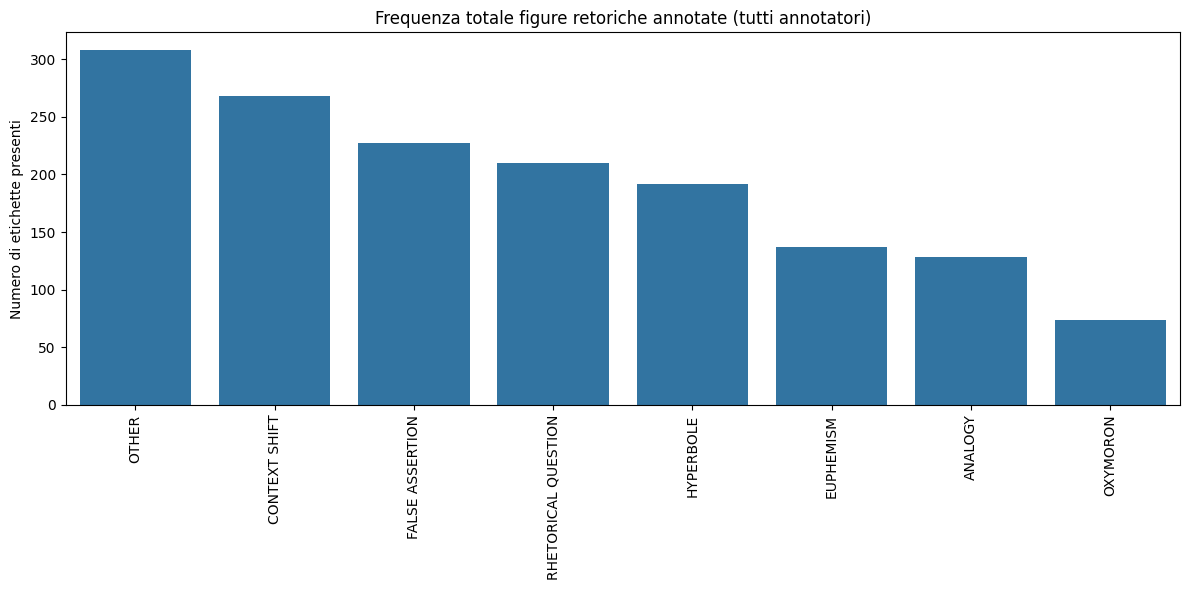

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2a) Distribuzione totale figure retoriche (somma su tutti annotatori)
total_counts = {fig: 0 for fig in figures}
for annotator in all_annotators:
    df = final_cleaned[annotator]
    for fig in figures:
        total_counts[fig] += df[fig].sum()

# Ordina per frequenza decrescente
sorted_counts = dict(sorted(total_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12,6))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()))
plt.xticks(rotation=90)
plt.title("Frequenza totale figure retoriche annotate (tutti annotatori)")
plt.ylabel("Numero di etichette presenti")
plt.tight_layout()
plt.show()


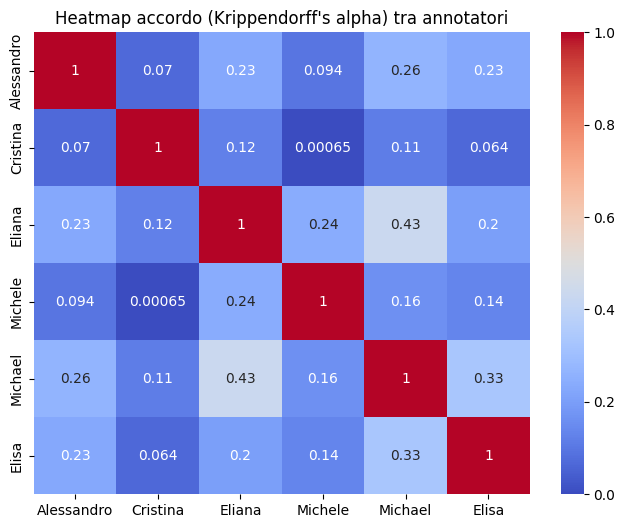

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import simpledorff  # Assumi che sia installato e importabile

def calc_kripp_for_pair(df1, df2, figures):
    alphas = []
    # Trova unità comuni (post_id, reply_id)
    units1 = set(zip(df1['post_id'], df1['reply_id']))
    units2 = set(zip(df2['post_id'], df2['reply_id']))
    common_units = units1.intersection(units2)
    if len(common_units) == 0:
        return np.nan

    for fig in figures:
        rows = []
        for unit in common_units:
            val1 = df1[(df1['post_id'] == unit[0]) & (df1['reply_id'] == unit[1])][fig].values
            val2 = df2[(df2['post_id'] == unit[0]) & (df2['reply_id'] == unit[1])][fig].values
            if len(val1) == 0 or len(val2) == 0:
                continue
            rows.append([unit, 'annotator1', val1[0]])
            rows.append([unit, 'annotator2', val2[0]])

        if len(rows) == 0:
            continue

        df_for_alpha = pd.DataFrame(rows, columns=['unit_id', 'annotator_id', 'Annotation'])

        unique_values = df_for_alpha['Annotation'].dropna().unique()
        if len(unique_values) <= 1:
            continue

        try:
            alpha = simpledorff.calculate_krippendorffs_alpha_for_df(
                df_for_alpha,
                experiment_col='unit_id',
                annotator_col='annotator_id',
                class_col='Annotation'
            )
            alphas.append(alpha)
        except ZeroDivisionError:
            continue

    if alphas:
        return np.mean(alphas)
    else:
        return np.nan

annotators = list(final_cleaned.keys())
figures = all_figures

# Inizializza matrice vuota
alpha_matrix = pd.DataFrame(index=annotators, columns=annotators, dtype=float)

for i, ann1 in enumerate(annotators):
    for j, ann2 in enumerate(annotators):
        if i == j:
            alpha_matrix.loc[ann1, ann2] = 1.0  # accordo perfetto
        elif pd.isna(alpha_matrix.loc[ann1, ann2]):
            df1 = final_cleaned[ann1]
            df2 = final_cleaned[ann2]

            alpha = calc_kripp_for_pair(df1, df2, figures)

            alpha_matrix.loc[ann1, ann2] = alpha
            alpha_matrix.loc[ann2, ann1] = alpha  # simmetrico

plt.figure(figsize=(8,6))
sns.heatmap(alpha_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Heatmap accordo (Krippendorff's alpha) tra annotatori")
plt.show()


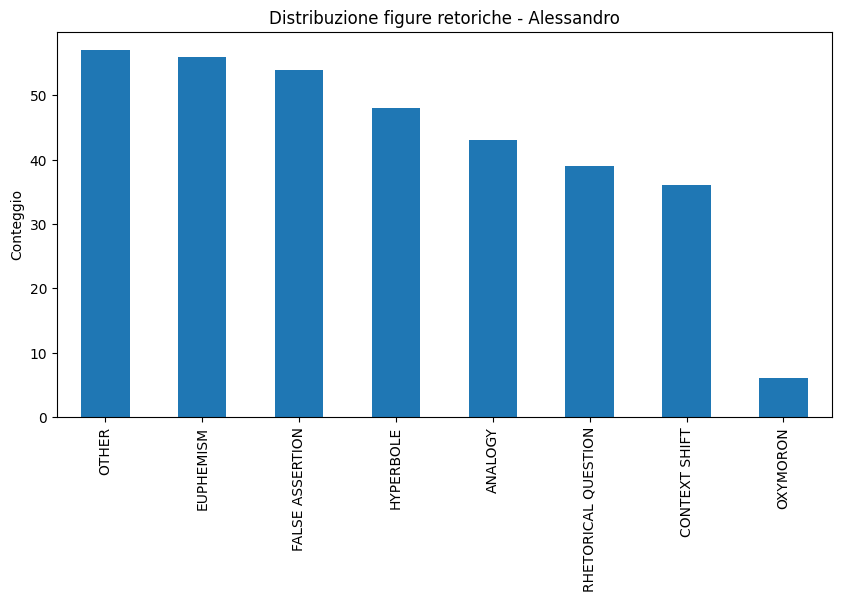

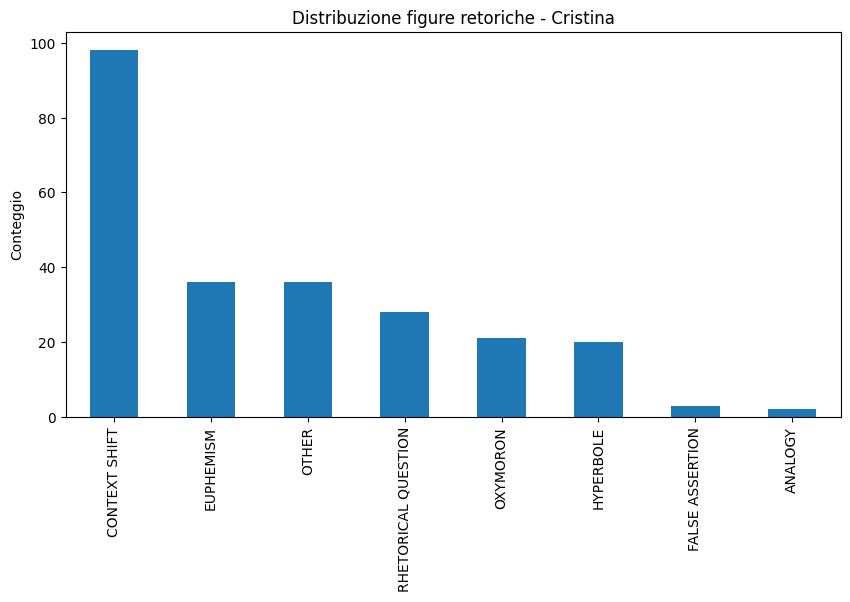

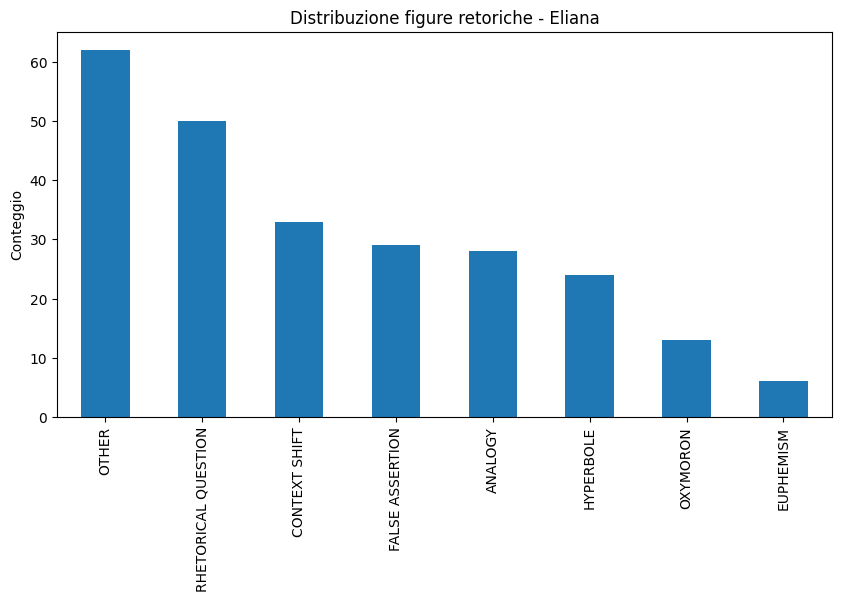

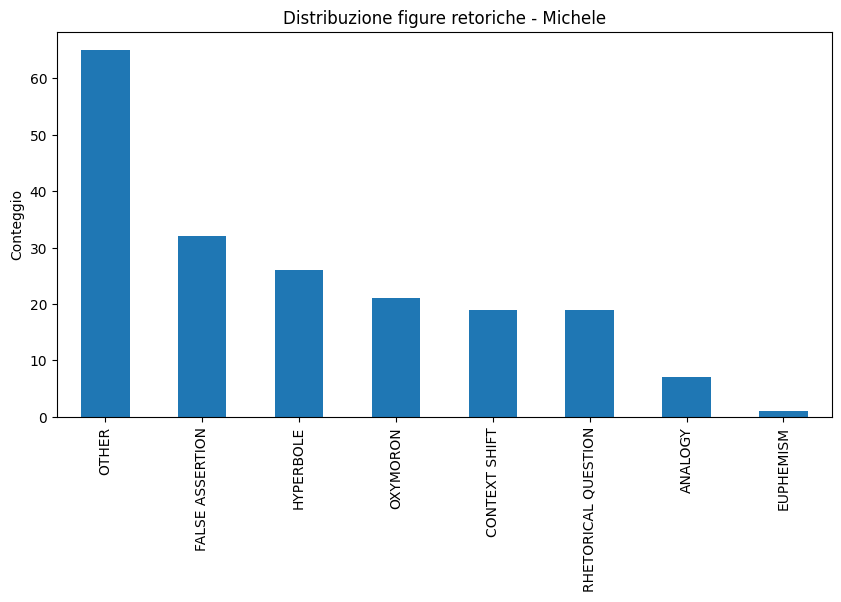

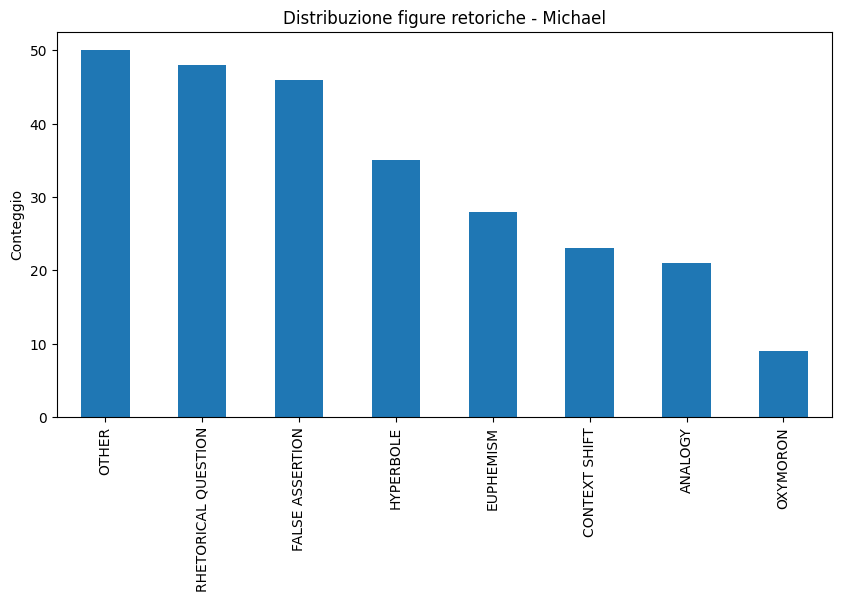

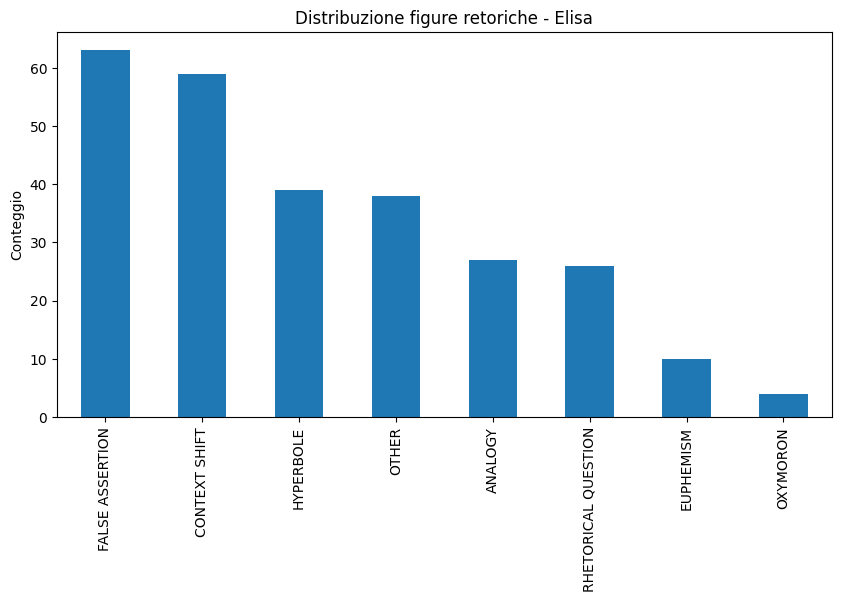

In [13]:
import matplotlib.pyplot as plt

for annotator in annotators:
    counts = final_cleaned[annotator][all_figures].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    counts.plot(kind='bar')
    plt.title(f"Distribuzione figure retoriche - {annotator}")
    plt.ylabel("Conteggio")
    plt.show()


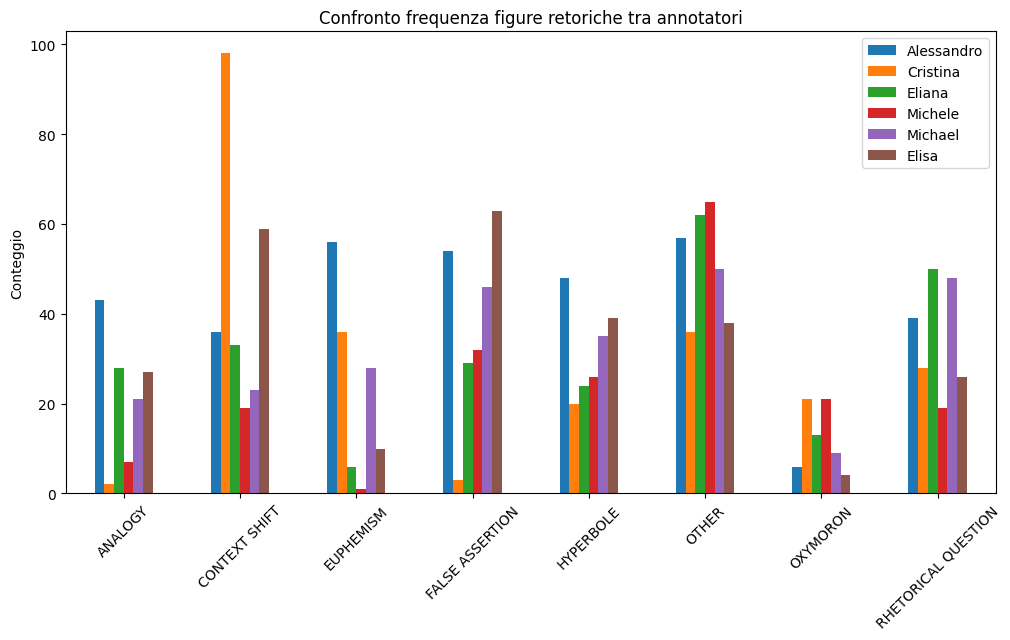

In [14]:
counts_df = pd.DataFrame({ann: final_cleaned[ann][all_figures].sum() for ann in annotators})
counts_df.plot(kind='bar', figsize=(12,6))
plt.title("Confronto frequenza figure retoriche tra annotatori")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)
plt.show()


# Polarization index

## Funzioni

In [15]:
from sklearn.metrics import jaccard_score

def compute_agreement(instance_df):
    labels = instance_df.drop(columns=['post_id', 'reply_id', 'annotator']).values
    n = labels.shape[0]
    
    if n < 2:
        return 0.0
    
    scores = []
    for i in range(n):
        for j in range(i + 1, n):
            s = jaccard_score(labels[i], labels[j], average='binary', zero_division=0)
            scores.append(s)
    
    return np.mean(scores) if scores else 0.0


def compute_p_index(instance_df, group_map):
    k = len(set(group_map.values()))
    aG = compute_agreement(instance_df)

    group_agreements = []

    for group in set(group_map.values()):
        annotators_in_group = [a for a, g in group_map.items() if g == group]
        group_df = instance_df[instance_df['annotator'].isin(annotators_in_group)]
        aGw = compute_agreement(group_df)
        group_agreements.append(aGw * (1 - aG))
    
    return sum(group_agreements) / k


## Polarization su generazione

### Real

In [16]:
# from scipy.stats import chisquare

# Esempio: gruppi per GENERE (ipotetico, va adattato ai tuoi dati reali)
annotator_groups = {
    'Alessandro': 'genX',
    'Michele': 'genY',
    'Michael': 'genZ',
    'Cristina': 'genX',
    'Eliana': 'genY',
    'Elisa': 'genZ'
}

# Crea dataframe con annotazioni binarie per ogni figura
all_annotations = []
for annotator, df_ann in final_cleaned.items():
    df_copy = df_ann.copy()
    df_copy['annotator'] = annotator
    all_annotations.append(df_copy[['post_id', 'reply_id', 'annotator'] + all_figures])

full_df = pd.concat(all_annotations, ignore_index=True)
full_df.head()

p_index_per_instance = {}

group_map = annotator_groups  # come definito sopra
before = full_df[['post_id', 'reply_id']].shape[0]
instances = full_df[['post_id', 'reply_id']].drop_duplicates()

print(f"Numero totale di annotazioni: {before}")
print(f"Numero di istanze uniche (post_id, reply_id): {instances.shape[0]}")
print(f"Duplicati rimossi: {before - instances.shape[0]}")

for _, row in instances.iterrows():
    pid, rid = row['post_id'], row['reply_id']
    instance_df = full_df[(full_df['post_id'] == pid) & (full_df['reply_id'] == rid)]

    #if len(instance_df) < 2:
    #    continue  # troppo pochi annotatori per calcolare
    
    p_index = compute_p_index(instance_df, group_map)
    p_index_per_instance[(pid, rid)] = p_index

mean_p_index_real = sum(p_index_per_instance.values()) / len(p_index_per_instance)
print(f"Media del P-index per tutti i post: {mean_p_index_real:.3f}")

# Trova l'istanza con P-index massimo e minimo
max_instance = max(p_index_per_instance.items(), key=lambda x: x[1])
min_instance = min(p_index_per_instance.items(), key=lambda x: x[1])

print("\n--- ISTANZA CON P-INDEX MASSIMO ---")
print(f"post_id: {max_instance[0][0]}, reply_id: {max_instance[0][1]}, P-index: {max_instance[1]:.3f}")
display(full_df[(full_df['post_id'] == max_instance[0][0]) & (full_df['reply_id'] == max_instance[0][1])])

print("\n--- ISTANZA CON P-INDEX MINIMO ---")
print(f"post_id: {min_instance[0][0]}, reply_id: {min_instance[0][1]}, P-index: {min_instance[1]:.3f}")
display(full_df[(full_df['post_id'] == min_instance[0][0]) & (full_df['reply_id'] == min_instance[0][1])])


Numero totale di annotazioni: 1206
Numero di istanze uniche (post_id, reply_id): 201
Duplicati rimossi: 1005
Media del P-index per tutti i post: 0.197

--- ISTANZA CON P-INDEX MASSIMO ---
post_id: 1894119167367809024, reply_id: 9033280000000000000, P-index: 0.583


,post_id,reply_id,annotator,ANALOGY,CONTEXT SHIFT,EUPHEMISM,FALSE ASSERTION,HYPERBOLE,OTHER,OXYMORON,RHETORICAL QUESTION
19,1894119167367809024,9033280000000000000,Alessandro,1,0,0,0,0,1,0,0
220,1894119167367809024,9033280000000000000,Cristina,1,0,0,0,0,1,0,0
421,1894119167367809024,9033280000000000000,Eliana,0,0,0,0,0,1,0,0
622,1894119167367809024,9033280000000000000,Michele,0,0,0,0,0,1,0,0
823,1894119167367809024,9033280000000000000,Michael,0,1,0,1,0,0,0,0
1024,1894119167367809024,9033280000000000000,Elisa,0,0,0,1,0,0,0,0



--- ISTANZA CON P-INDEX MINIMO ---
post_id: 5929177359346716672, reply_id: 5855670000000000000, P-index: 0.000


,post_id,reply_id,annotator,ANALOGY,CONTEXT SHIFT,EUPHEMISM,FALSE ASSERTION,HYPERBOLE,OTHER,OXYMORON,RHETORICAL QUESTION
3,5929177359346716672,5855670000000000000,Alessandro,0,0,0,1,0,0,0,0
204,5929177359346716672,5855670000000000000,Cristina,0,0,1,0,0,0,0,0
405,5929177359346716672,5855670000000000000,Eliana,0,0,1,0,0,0,0,0
606,5929177359346716672,5855670000000000000,Michele,0,0,0,1,0,0,1,0
807,5929177359346716672,5855670000000000000,Michael,0,0,1,0,0,0,0,0
1008,5929177359346716672,5855670000000000000,Elisa,0,0,0,1,0,0,0,0


### su coppie casuali (insieme delle parti)

In [17]:
import itertools
import pandas as pd

annotators = list(final_cleaned.keys())

# Dimensioni gruppi (esempio: metà e metà)
group1_size = len(annotators) // 3
group2_size = len(annotators) - group1_size

# Tutte le combinazioni possibili per il gruppo1
all_combinations = list(itertools.combinations(annotators, group1_size))
print(all_combinations)

print(f"Numero totale combinazioni: {len(all_combinations)}")

# Prepara il dataframe completo come prima
all_annotations = []
for annotator, df_ann in final_cleaned.items():
    df_copy = df_ann.copy()
    df_copy['annotator'] = annotator
    all_annotations.append(df_copy[['post_id', 'reply_id', 'annotator'] + all_figures])

full_df = pd.concat(all_annotations, ignore_index=True)
instances = full_df[['post_id', 'reply_id']].drop_duplicates()

p_index_means = []

for i, group1 in enumerate(all_combinations, 1):
    group2 = [a for a in annotators if a not in group1]
    group_map = {a: 'group1' if a in group1 else 'group2' for a in annotators}
    
    p_index_per_instance = {}
    
    for _, row in instances.iterrows():
        pid, rid = row['post_id'], row['reply_id']
        instance_df = full_df[(full_df['post_id'] == pid) & (full_df['reply_id'] == rid)]
        
        p_index = compute_p_index(instance_df, group_map)
        p_index_per_instance[(pid, rid)] = p_index
    
    mean_p_index = sum(p_index_per_instance.values()) / len(p_index_per_instance)
    p_index_means.append(mean_p_index)

    if i % 10 == 0 or i == len(all_combinations):
        print(f"Calcolate {i}/{len(all_combinations)} combinazioni, ultima media P-index: {mean_p_index:.3f}")

# Statistiche finali
overall_mean_random = sum(p_index_means) / len(p_index_means)
print(f"\nMedia del P-index su tutte le permutazioni: {overall_mean_random:.3f}")


[('Alessandro', 'Cristina'), ('Alessandro', 'Eliana'), ('Alessandro', 'Michele'), ('Alessandro', 'Michael'), ('Alessandro', 'Elisa'), ('Cristina', 'Eliana'), ('Cristina', 'Michele'), ('Cristina', 'Michael'), ('Cristina', 'Elisa'), ('Eliana', 'Michele'), ('Eliana', 'Michael'), ('Eliana', 'Elisa'), ('Michele', 'Michael'), ('Michele', 'Elisa'), ('Michael', 'Elisa')]
Numero totale combinazioni: 15
Calcolate 10/15 combinazioni, ultima media P-index: 0.189
Calcolate 15/15 combinazioni, ultima media P-index: 0.207

Media del P-index su tutte le permutazioni: 0.179


### Delta

In [18]:
def calc_delta(real, random):
    return ((real - random) / random) * 100

print("\nDelta tra P-index reale e medio casuale:")
print(f"  Reale: {mean_p_index_real:.3f}")
print(f"  Casual: {overall_mean_random:.3f}")

print(calc_delta(mean_p_index_real, overall_mean_random))


Delta tra P-index reale e medio casuale:
  Reale: 0.197
  Casual: 0.179
10.044649629734186


## Polarization su genere

### Real

In [19]:
# from scipy.stats import chisquare

# Esempio: gruppi per GENERE (ipotetico, va adattato ai tuoi dati reali)
annotator_groups = {
    'Alessandro': 'male',
    'Michele': 'male',
    'Michael': 'male',
    'Cristina': 'female',
    'Eliana': 'female',
    'Elisa': 'female'
}

# Crea dataframe con annotazioni binarie per ogni figura
all_annotations = []
for annotator, df_ann in final_cleaned.items():
    df_copy = df_ann.copy()
    df_copy['annotator'] = annotator
    all_annotations.append(df_copy[['post_id', 'reply_id', 'annotator'] + all_figures])

full_df = pd.concat(all_annotations, ignore_index=True)
full_df.head()

p_index_per_instance = {}

group_map = annotator_groups  # come definito sopra
before = full_df[['post_id', 'reply_id']].shape[0]
instances = full_df[['post_id', 'reply_id']].drop_duplicates()

print(f"Numero totale di annotazioni: {before}")
print(f"Numero di istanze uniche (post_id, reply_id): {instances.shape[0]}")
print(f"Duplicati rimossi: {before - instances.shape[0]}")

for _, row in instances.iterrows():
    pid, rid = row['post_id'], row['reply_id']
    instance_df = full_df[(full_df['post_id'] == pid) & (full_df['reply_id'] == rid)]

    #if len(instance_df) < 2:
    #    continue  # troppo pochi annotatori per calcolare
    
    p_index = compute_p_index(instance_df, group_map)
    p_index_per_instance[(pid, rid)] = p_index

mean_p_index_real = sum(p_index_per_instance.values()) / len(p_index_per_instance)
print(f"Media del P-index per tutti i post: {mean_p_index_real:.3f}")

# Trova l'istanza con P-index massimo e minimo
max_instance = max(p_index_per_instance.items(), key=lambda x: x[1])
min_instance = min(p_index_per_instance.items(), key=lambda x: x[1])

print("\n--- ISTANZA CON P-INDEX MASSIMO ---")
print(f"post_id: {max_instance[0][0]}, reply_id: {max_instance[0][1]}, P-index: {max_instance[1]:.3f}")
display(full_df[(full_df['post_id'] == max_instance[0][0]) & (full_df['reply_id'] == max_instance[0][1])])

print("\n--- ISTANZA CON P-INDEX MINIMO ---")
print(f"post_id: {min_instance[0][0]}, reply_id: {min_instance[0][1]}, P-index: {min_instance[1]:.3f}")
display(full_df[(full_df['post_id'] == min_instance[0][0]) & (full_df['reply_id'] == min_instance[0][1])])

Numero totale di annotazioni: 1206
Numero di istanze uniche (post_id, reply_id): 201
Duplicati rimossi: 1005
Media del P-index per tutti i post: 0.163

--- ISTANZA CON P-INDEX MASSIMO ---
post_id: 9568837740787623936, reply_id: 2564980000000000000, P-index: 0.476


,post_id,reply_id,annotator,ANALOGY,CONTEXT SHIFT,EUPHEMISM,FALSE ASSERTION,HYPERBOLE,OTHER,OXYMORON,RHETORICAL QUESTION
50,9568837740787623936,2564980000000000000,Alessandro,0,0,0,0,1,1,0,0
251,9568837740787623936,2564980000000000000,Cristina,0,1,0,0,0,0,0,0
452,9568837740787623936,2564980000000000000,Eliana,0,1,0,0,0,0,0,0
653,9568837740787623936,2564980000000000000,Michele,0,0,0,0,1,0,1,0
854,9568837740787623936,2564980000000000000,Michael,0,0,0,0,0,1,0,0
1055,9568837740787623936,2564980000000000000,Elisa,0,1,0,0,0,0,0,0



--- ISTANZA CON P-INDEX MINIMO ---
post_id: 5168625731641847808, reply_id: 6591050000000000000, P-index: 0.000


,post_id,reply_id,annotator,ANALOGY,CONTEXT SHIFT,EUPHEMISM,FALSE ASSERTION,HYPERBOLE,OTHER,OXYMORON,RHETORICAL QUESTION
26,5168625731641847808,6591050000000000000,Alessandro,1,1,0,0,0,0,0,0
227,5168625731641847808,6591050000000000000,Cristina,0,1,0,0,1,0,0,0
428,5168625731641847808,6591050000000000000,Eliana,0,0,0,0,0,1,0,0
629,5168625731641847808,6591050000000000000,Michele,0,0,0,0,1,0,0,0
830,5168625731641847808,6591050000000000000,Michael,0,0,1,0,0,0,0,0
1031,5168625731641847808,6591050000000000000,Elisa,0,0,0,1,0,0,0,0


### su triple (insieme delle parti)

In [20]:
import itertools
import pandas as pd

annotators = list(final_cleaned.keys())

# Dimensioni gruppi (esempio: metà e metà)
group1_size = len(annotators) // 2
group2_size = len(annotators) - group1_size

# Tutte le combinazioni possibili per il gruppo1
all_combinations = list(itertools.combinations(annotators, group1_size))
print(all_combinations)

print(f"Numero totale combinazioni: {len(all_combinations)}")

# Prepara il dataframe completo come prima
all_annotations = []
for annotator, df_ann in final_cleaned.items():
    df_copy = df_ann.copy()
    df_copy['annotator'] = annotator
    all_annotations.append(df_copy[['post_id', 'reply_id', 'annotator'] + all_figures])

full_df = pd.concat(all_annotations, ignore_index=True)
instances = full_df[['post_id', 'reply_id']].drop_duplicates()

p_index_means = []

for i, group1 in enumerate(all_combinations, 1):
    group2 = [a for a in annotators if a not in group1]
    group_map = {a: 'group1' if a in group1 else 'group2' for a in annotators}
    
    p_index_per_instance = {}
    
    for _, row in instances.iterrows():
        pid, rid = row['post_id'], row['reply_id']
        instance_df = full_df[(full_df['post_id'] == pid) & (full_df['reply_id'] == rid)]
        
        p_index = compute_p_index(instance_df, group_map)
        p_index_per_instance[(pid, rid)] = p_index
    
    mean_p_index = sum(p_index_per_instance.values()) / len(p_index_per_instance)
    p_index_means.append(mean_p_index)

    if i % 10 == 0 or i == len(all_combinations):
        print(f"Calcolate {i}/{len(all_combinations)} combinazioni, ultima media P-index: {mean_p_index:.3f}")

# Statistiche finali
overall_mean_random = sum(p_index_means) / len(p_index_means)
print(f"\nMedia del P-index su tutte le permutazioni: {overall_mean_random:.3f}")


[('Alessandro', 'Cristina', 'Eliana'), ('Alessandro', 'Cristina', 'Michele'), ('Alessandro', 'Cristina', 'Michael'), ('Alessandro', 'Cristina', 'Elisa'), ('Alessandro', 'Eliana', 'Michele'), ('Alessandro', 'Eliana', 'Michael'), ('Alessandro', 'Eliana', 'Elisa'), ('Alessandro', 'Michele', 'Michael'), ('Alessandro', 'Michele', 'Elisa'), ('Alessandro', 'Michael', 'Elisa'), ('Cristina', 'Eliana', 'Michele'), ('Cristina', 'Eliana', 'Michael'), ('Cristina', 'Eliana', 'Elisa'), ('Cristina', 'Michele', 'Michael'), ('Cristina', 'Michele', 'Elisa'), ('Cristina', 'Michael', 'Elisa'), ('Eliana', 'Michele', 'Michael'), ('Eliana', 'Michele', 'Elisa'), ('Eliana', 'Michael', 'Elisa'), ('Michele', 'Michael', 'Elisa')]
Numero totale combinazioni: 20
Calcolate 10/20 combinazioni, ultima media P-index: 0.182
Calcolate 20/20 combinazioni, ultima media P-index: 0.174

Media del P-index su tutte le permutazioni: 0.179


### Delta

In [21]:
def calc_delta(real, random):
    return ((real - random) / random) * 100

print("\nDelta tra P-index reale e medio casuale:")
print(f"  Reale: {mean_p_index_real:.3f}")
print(f"  Casual: {overall_mean_random:.3f}")

print(calc_delta(mean_p_index_real, overall_mean_random))


Delta tra P-index reale e medio casuale:
  Reale: 0.163
  Casual: 0.179
-8.740145799808715
